# Descriptive statistics : Correlation  & Z Score

# Correlation

Statistik dan data science sering berkaitan antara hubungan 2 variabel atau lebih dari suatu dataset. Setiap titik data dalam dataset adalah pengamatan dan fitur-fiturnya adalah properti.

Setiap dataset yang digunakan mengandung variabel dan observasi. Misalnya Bagaimana ketinggian pemain basket berkorelasi dengan ketepatan menembak mereka. 

Contoh lain Apakah ada hubungan antara pengalaman kerja karyawan dengan gaji yang di dapat.

Ketika data direpresentasikan dalam bentuk tabel, baris-baris tabel itu biasanya pengamatan, sedangkan kolom adalah fitur. Seperti tabel karyawan di bawah ini :



In [1]:
import pandas as pd

data = {'Name' :['Ann','Robb','Tom','Ivy'], 'Years Of Experience':[30,19,21,10], 'Salary':[120.000,90.000,105.000,82.000]}

In [2]:
df = pd.DataFrame(data)
df


,Name,Years Of Experience,Salary
0,Ann,30,120.0
1,Robb,19,90.0
2,Tom,21,105.0
3,Ivy,10,82.0


Contoh tipe dari sebuah korelasi :

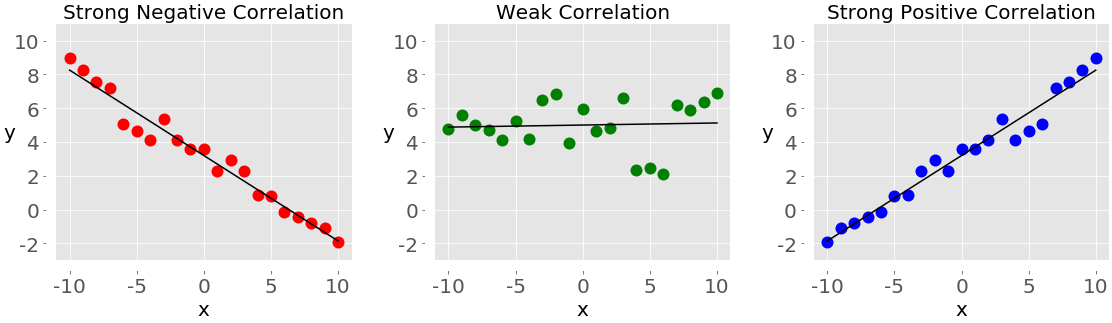

- Korelasi negatif (Titik merah) menunjukkan nilai y cenderung menurun seiring meningkatnya nilai x, ini menujukkan korelasi negatif yang kuat.
- Lemah atau tidak ada korelasi (Titik hijau) Plot di tengah menunjukkan tren yang jelas. Ini adalah bentuk korelasi yang lemah
- Korelasi positif (Titik Biru)

Berikut plot dari tabel karyawan :

In [3]:
import numpy as np
x =np.array([30,19,21,10]).reshape(-1,1)
x

array([[30],
       [19],
       [21],
       [10]])

In [4]:
y = df['Salary']
y

0    120.0
1     90.0
2    105.0
3     82.0
Name: Salary, dtype: float64

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression


In [6]:
model = LinearRegression().fit(x,y)

In [7]:
r_square = model.score(x,y)
print(r_square)

0.9121948510174313


In [8]:
print('Intercept: ', model.intercept_)
print('Slope: ', model.coef_)

Intercept:  60.14108910891089
Slope:  [1.95544554]


In [9]:
y_pred = model.predict(x)
print('predicted response:', y_pred , sep='\n')

predicted response:
[118.80445545  97.29455446 101.20544554  79.69554455]


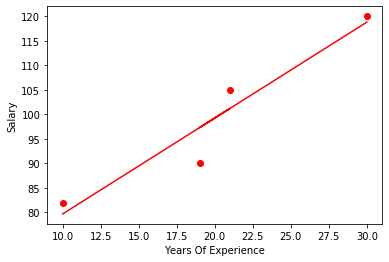

In [10]:
plt.scatter(x, y, color='r')
plt.plot(x, y_pred, color = 'r')
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
plt.show()

Korelasi antara pengalaman dan gaji adalah positif karena pengalaman yang lebih tinggi sesuai dengan gaji yang lebih besar dan sebaliknya.

Korelasi terhubung erat dengan jumlah statistik lainnya seperti rata-rata, standar deviasi, varians dan kovarian.

Ada beberapa statistik yang dapat diguakan untuk mengukur korelasi:
- Pearsons'r
- Spearman's rho
- Kendall's tau

Koefisien Pearson's r mengukur korelasi linier, sedangkan spearman dan kendall membadingkan jajaran data.

## Menghitung korelasi menggunakan Numpy

In [11]:
import numpy as np 
x = np.arange (10,20)
x

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [12]:
y = np.array([2,1,4,5, 6,8,12,25,96,48])
y

array([ 2,  1,  4,  5,  6,  8, 12, 25, 96, 48])

In [13]:
r = np.corrcoef(x, y)
r

array([[1.        , 0.73598478],
       [0.73598478, 1.        ]])

In [14]:
print(r[0, 1])
print(r[1,0])

0.7359847767859796
0.7359847767859797


corrcoef() mengembalikan matriks korelasi, yang merupakan array 2 dimensi dengan koefisien korelasi.

gambaran dari korelasi matriks yang telah dibuat :

        x       y
    x  1.00    0.76
    y  0.76    1.00

Nilai pada diagonal utama dari matriks korelasi (kiri atas dan kanan bawah) sama dengan 1. Nilai kiri atas sesuai dengan koefisien korelasi untuk x dan x sedangkan nilai kanan bawah adalah koefisien korelasi untuk y dan y. Mereka selalu sama dengan 1

## Menggunakan Scipy

In [15]:
import scipy.stats

In [16]:
scipy.stats.pearsonr(x , y) #Pearson's r

(0.7359847767859798, 0.015235019240389391)

In [17]:
scipy.stats.spearmanr(x,y) #Spearman's rho

SpearmanrResult(correlation=0.9757575757575757, pvalue=1.4675461874042197e-06)

In [18]:
scipy.stats.kendalltau(x,y) #Kendall's tau

KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)

Dengan menggunakan scipy kita melihat terdapat 2 nilai yang dikembalikan, koefisien korelasi dan p-value.

p-value berguna untuk menguji sebuah hipotesis. p-value adalah ukuran penting dalam hal probabilitas dan statistik untuk menafsirkan sebuah hipotesis. 

In [19]:
#Mendapatkan p-value dalam pearson'r
r, p = scipy.stats.pearsonr(x,y)
print('r : ' + str(r))
print('p-value : ' + str(p))

r : 0.7359847767859798
p-value : 0.015235019240389391


In [20]:
print(scipy.stats.pearsonr(x , y)[0])
print(scipy.stats.spearmanr(x,y)[0])
print(scipy.stats.kendalltau(x,y)[0])

0.7359847767859798
0.9757575757575757
0.911111111111111


## Menggunakan Pandas

Dalam beberapa kasus, panda lebih nyaman digunakan dibanding numpy dan scipy untuk menghitung statistik. Panda menawarkan metode statistik untuk instance series dan dataframe. Misal, dari 2 objek series dengan jumlah item yang sama kita dapat menggunakan fungsi .corr() di salah satu objek tersebut.

In [21]:
 import pandas as pd

x = pd.Series(range(10,20))
x

0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [22]:
y = pd.Series([2,1,4,5,8,12,18,25,96,48])
y

0     2
1     1
2     4
3     5
4     8
5    12
6    18
7    25
8    96
9    48
dtype: int64

In [23]:
x.corr(y) #Pearson's r

0.7586402890911867

In [24]:
y.corr(x)

0.7586402890911866

In [25]:
x.corr(y, method='spearman') #Spearman who

0.9757575757575757

In [26]:
y.corr(x, method='spearman')

0.9757575757575757

In [27]:
y.corr(x, method='kendall')

0.911111111111111

In [28]:
x.corr(y, method='kendall')

0.911111111111111

# Linear Correlation

Korelasi linear mengukur kedekatan hubungan matematis antara variabel atau fitur dataset dengan fungsi linier. Jika hubungan antara kedua fitur lebih dekat ke beberapa fungsi linear, maka korelasi liniearnya lebih kuat dan nilai absolut dari koefisien korelasi lebih tinggi.

jadi korelasi linear berguna untuk mengetahui apakah ada hubungan di antara variabel.

## Pearson'r Correlation Coefficient

Fakta penting tentang koefisien korelasi pearson:

- Keofisien korelasi pearson dapat mengambil nilai riil apapun itu dalam kisaran -<= r >= 1.
- Nilai maksimum r = 1.
- r > 1 menggambarkan korelasi yang positif di antara variabel
- r < 0 menggambarkan korelasi negatif di antara variabel
- r = 0 menggambarkan tidak ada korelasi di antara variabel

# Linear Regression menggunakan SciPy

Linear regressio adalah proses menemukan fungsi liner yang sedekat mungkin dengan hubungan aktual antara fitur. Dengan kata lain, kita menentukan fungsi linear yang paling menggambarkan hubungan antar fitur.

Untuk itu, library SciPy dapat digunakan untuk mendapatkan fungsi linier yang paling mendekati hubungan antara 2 aray serta korelasi koefisien pears.on

In [29]:
import numpy as np
import scipy.stats

x = np.arange(10,20)
y = np.array([2,1,4,5,8,12,18,25,96,48])

In [30]:
result = scipy.stats.linregress(x , y)

#scipy.stats.linregress untuk melakukan regresi linier dengan 2 array yang memiliki panjang yang sama.

In [31]:
result

LinregressResult(slope=7.4363636363636365, intercept=-85.92727272727274, rvalue=0.7586402890911869, pvalue=0.010964341301680825, stderr=2.257878767543913)

Hasil yang di dapatkan:

- Slope = sebagai kemiringan garis regresi
- intercept = intercept dari garis regresi
- p-value
- stderr = kesalahan standar gradien yang diestimasi

In [32]:
#Cara lain

xy = np.array([[10,11,12,13,14,15,16,17,18,19],
              [2,1,4,5,8,12,18,25,96,48]])

In [33]:
scipy.stats.linregress(x,y)

LinregressResult(slope=7.4363636363636365, intercept=-85.92727272727274, rvalue=0.7586402890911869, pvalue=0.010964341301680825, stderr=2.257878767543913)

In [34]:
xy.T

array([[10,  2],
       [11,  1],
       [12,  4],
       [13,  5],
       [14,  8],
       [15, 12],
       [16, 18],
       [17, 25],
       [18, 96],
       [19, 48]])

In [35]:
scipy.stats.linregress(x,y.T)

LinregressResult(slope=7.4363636363636365, intercept=-85.92727272727274, rvalue=0.7586402890911869, pvalue=0.010964341301680825, stderr=2.257878767543913)

## Pearson Correlation : Numpy and SciPy Implementation

In [36]:
r , p = scipy.stats.pearsonr(x , y)

In [37]:
print(r)
print(p)

0.758640289091187
0.010964341301680813


In [38]:
np.corrcoef(x , y)

array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

In [39]:
np.corrcoef(xy)

array([[1.        , 0.75864029],
       [0.75864029, 1.        ]])

In [40]:
xyz = np.array([[10,11,12,13,14,15,16,17,18,19],
               [2,1,4,5,8,12,18,25,96,48],
               [5,3,2,1,0,-2,-8,-11,-15,-16]])

In [41]:
np.corrcoef(xyz)

array([[ 1.        ,  0.75864029, -0.96807242],
       [ 0.75864029,  1.        , -0.83407922],
       [-0.96807242, -0.83407922,  1.        ]])

"""
     x        y       z
x   1.00     0.76   -0.97
y   0.76     1.00   -0.84
z  -0.97    -0.84    1.00

"""

### nan values

In [42]:
arr_with_nan = np.array([[0,1,2,3],
                        [2,4,1,8],
                        [2,5, np.nan, 2]])

In [43]:
np.corrcoef(arr_with_nan)

array([[1.        , 0.62554324,        nan],
       [0.62554324, 1.        ,        nan],
       [       nan,        nan,        nan]])

Secara default numpy corrcoef() menganggap baris sebagai fitur dan kolom sebagai pengamatan.

Jika menginginkan perilaku sebaliknya dapat menggunakan parameter rowvar = False

In [44]:
xyz.T

array([[ 10,   2,   5],
       [ 11,   1,   3],
       [ 12,   4,   2],
       [ 13,   5,   1],
       [ 14,   8,   0],
       [ 15,  12,  -2],
       [ 16,  18,  -8],
       [ 17,  25, -11],
       [ 18,  96, -15],
       [ 19,  48, -16]])

In [45]:
np.corrcoef(xyz.T, rowvar = False)

array([[ 1.        ,  0.75864029, -0.96807242],
       [ 0.75864029,  1.        , -0.83407922],
       [-0.96807242, -0.83407922,  1.        ]])

## Pearson Correlation : Pandas Implementation

In [46]:
import pandas as pd

x = pd.Series(range(10, 20))
x


0    10
1    11
2    12
3    13
4    14
5    15
6    16
7    17
8    18
9    19
dtype: int64

In [47]:
 y = pd.Series([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
y

0     2
1     1
2     4
3     5
4     8
5    12
6    18
7    25
8    96
9    48
dtype: int64

In [48]:
 z = pd.Series([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
z

0     5
1     3
2     2
3     1
4     0
5    -2
6    -8
7   -11
8   -15
9   -16
dtype: int64

In [49]:
xy = pd.DataFrame({'x-values': x, 'y-values': y})
xy

,x-values,y-values
0,10,2
1,11,1
2,12,4
3,13,5
4,14,8
5,15,12
6,16,18
7,17,25
8,18,96
9,19,48


In [50]:
xyz = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values': z})
xyz

,x-values,y-values,z-values
0,10,2,5
1,11,1,3
2,12,4,2
3,13,5,1
4,14,8,0
5,15,12,-2
6,16,18,-8
7,17,25,-11
8,18,96,-15
9,19,48,-16


Menggunakan .corr() untuk mendapatkan korelasi koefisien pearson

In [51]:
x.corr(y)

0.7586402890911867

In [52]:
z.corr(x)

-0.9680724198337363

In [53]:
z.corr(y)

-0.8340792243486527

In [54]:
u , u_with_nan = pd.Series ([1,2,3]) , pd.Series([1, 2, np.nan, 3])
v, w = pd.Series([1,4,8]), pd.Series([1,4,154,8])

Dalam panda jika terdapat sebuah nan value makan .corr() akan tetap berfungsi dikarenakan .corr() akan mengabaikan nan value.

In [55]:
u.corr(v)

0.996615895540124

In [56]:
u_with_nan.corr(w)

0.996615895540124

In [57]:
corr_matrix = xy.corr()

In [58]:
corr_matrix

,x-values,y-values
x-values,1.00000,0.75864
y-values,0.75864,1.00000


In [59]:
# Mengakses nilai tunggal dengan label baris dan kolom
corr_matrix.at['x-values' , 'y-values']

0.7586402890911869

In [60]:
#Mengakses nilai menggunakan .iat berdasarkan posisi dan baris kolomnya.
corr_matrix.iat[1,0]

0.7586402890911869

In [61]:
#Menerapkan .corr() dengan 3 kolom sekaligus
xyz.corr()

,x-values,y-values,z-values
x-values,1.000000,0.758640,-0.968072
y-values,0.758640,1.000000,-0.834079
z-values,-0.968072,-0.834079,1.000000


Metode lain yang dapat digunakan adalah .corrwith(), untuk menghitung koefisien korelasi antara baris atau kolom dari suatu objek dataframe / seires :

In [62]:
xy.corrwith(z)

x-values   -0.968072
y-values   -0.834079
dtype: float64

## Rank Correlation

Rank correlation membadingkan peringkat atau urutan data yang terkait dengan dua variabel atau fitur dataset. jika urutannya sama, maka korelasinya kuat,positif, dan tinggi. Namun, jika urutannya dekat dengan terbalik, maka korelasinya kuat, negatif dan rendah.

# Scipy Implementation

In [63]:
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])

In [64]:
scipy.stats.rankdata(x)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [65]:
scipy.stats.rankdata(y)

array([ 2.,  1.,  3.,  4.,  5.,  6.,  7.,  8., 10.,  9.])

In [66]:
scipy.stats.rankdata(z)

array([10.,  9.,  8.,  7.,  6.,  5.,  4.,  3.,  2.,  1.])

x dan z adalah array yang monoton, sehingga peringkat mereka juga monoton. Nilai terkecil dalam y adalah 1 dan sesuai dengan peringkat 1. Terkecil kedua adalah2, yang sesua dengan peringkat 2. Nilai terbesar dalam y adalah 98 maka peringkat yang sesuai adalah 10.

Rankdata() memiliki paraemter opsional. ini memberitahu python apa yang harus dilakukan jika ada ikatan dalam array memiliki 2 / lebih nilai yang sama. Secara default, dapat memberikan rata-rata peringkat :

In [67]:
scipy.stats.rankdata([8,2,0,2])

array([4. , 2.5, 1. , 2.5])

ada 2 elemen dengan nilai 2 dan mereka memiliki peringkat 2 dan 3. nilai 0 memiliki peringkat 1 dan nilai 9 memiliki peringkat 4. kemudian, kedua elemen yang sama akan mendapatkan nilai rata-rata yaitu 2.5.

Rankdata() memperlakukan nilai nan seolah olah mereka memiliki peringkat yang lbh besar:

In [68]:
scipy.stats.rankdata([8, np.nan, 0 , 2])

array([3., 4., 1., 2.])

Dalam contoh di atas nan value mendapatkan peringkat terbesar 4. 

untuk mendapatkan peringkat metode np.argsort() juga dapat digunakan :

In [69]:
np.argsort(y) + 1

array([ 2,  1,  3,  4,  5,  6,  7,  8, 10,  9])

np.argsort() mengembalikan indeks yang akan dimiliki item array dalam array yang diurutkan. indeks ini berbasis nol, jadi harus ditambahkan 1 untuk semuanya

## Rank Correlation : Numpy and SciPy Implementation

Menghitung koefisien korelasi spearmanr menggunakan SciPy

In [70]:
result = scipy.stats.spearmanr(x , y)
result
result.correlation
result.pvalue

1.4675461874042197e-06

In [71]:
rho,p = scipy.stats.spearmanr(x,y)
print(rho)
print(p)

0.9757575757575757
1.4675461874042197e-06


spearmanr() mengembalikan objek yang berisi nilai keofisien korelasi spearman(rho) dan p-value.

In [72]:
xy = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
               [2, 1, 4, 5, 8, 12, 18, 25, 96, 48]])

In [73]:
rho, p = scipy.stats.spearmanr(xy, axis=1)
print(rho)
print(p)

0.9757575757575757
1.4675461874042197e-06


baris pertama xy adalah sebuah fitur dan baris kedua xy merupakan fitur lainnya. Untuk memodifikasi apakah kita menginginkan data tersebut menjadi sebuah kolom ataupun baris kita dapat menggunakan parameter axis = 0 sebagai kolom dan axis = 1 sebagai baris dan menjadikannya sebagai fitur.

Parameter lainnya yang dapat digunakan :
- 'propagate' untuk mengembalikan nilai nan jika ada nilai nan di antara input.
- 'raise' meningkatkan valueerror jika terdapat nilai nan di antara input.
- 'omit' untuk mengabaikan pengematan jika terdapat nilai nilai nan.

Contoh dengan menggunakan lebih dari 2 fitur maka akan mendapatkan matriks korelasi dan matriks p - value :

In [74]:
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

In [75]:
corr_matrix, p_matrix = scipy.stats.spearmanr(xyz, axis=1)
corr_matrix

array([[ 1.        ,  0.97575758, -1.        ],
       [ 0.97575758,  1.        , -0.97575758],
       [-1.        , -0.97575758,  1.        ]])

Nilai -1 dalam matriks korelasi menujukkan bahwa fitur pertama dan ketiga memiliki korelasi peringkat negatif sempurna yaitu bahwa nilai yang lebih besar di baris pertama selalu sesuai dengan nilai yang lebih kecil di baris ketiga.

In [76]:
p_matrix

array([[6.64689742e-64, 1.46754619e-06, 6.64689742e-64],
       [1.46754619e-06, 6.64689742e-64, 1.46754619e-06],
       [6.64689742e-64, 1.46754619e-06, 6.64689742e-64]])

## Kendal tau: SciPy Implementation

In [77]:
result = scipy.stats.kendalltau(x,y)
result

KendalltauResult(correlation=0.911111111111111, pvalue=2.9761904761904762e-05)

In [78]:
result.correlation

0.911111111111111

In [79]:
tau , p = scipy.stats.kendalltau(x,y)

In [80]:
tau

0.911111111111111

In [81]:
p

2.9761904761904762e-05

kendalltau() berfungsi sama seperti spearmanr(). Dibutuhkan 2 array 1 dimensi, memiliki parameter opsional nan_policy dan mengembalikan objek dengan nilai koefisien korelasi dan p-value.

## Rank correlation : Pandas Implementation

In [82]:
x, y, z = pd.Series(x), pd.Series(y), pd.Series(z)
xy = pd.DataFrame({'x-values': x, 'y-values': y})
xyz = pd.DataFrame({'x-values': x, 'y-values': y, 'z-values': z})

In [83]:
x.corr(y, method='spearman')

0.9757575757575757

In [84]:
xy.corr(method='spearman')

,x-values,y-values
x-values,1.000000,0.975758
y-values,0.975758,1.000000


In [85]:
xyz.corr(method='spearman')

,x-values,y-values,z-values
x-values,1.000000,0.975758,-1.000000
y-values,0.975758,1.000000,-0.975758
z-values,-1.000000,-0.975758,1.000000


In [86]:
x.corr(y, method='kendall')

0.911111111111111

In [87]:
xy.corr(method='kendall')

,x-values,y-values
x-values,1.000000,0.911111
y-values,0.911111,1.000000


In [88]:
xyz.corr(method='kendall')

,x-values,y-values,z-values
x-values,1.000000,0.911111,-1.000000
y-values,0.911111,1.000000,-0.911111
z-values,-1.000000,-0.911111,1.000000


Sama seperti ketika menghitung koefisien korelasi pearson tetapi untuk mencari koefisien korelasi spearman dan kendall dengan menambahkan metode parameter 'spearmanr' / 'kendall'

## Visualization of Correlation

Dengan memvisualisasikan korelasi yang sudah dibuat kita dapat melihat bagaiman secara visual hubungan yang mewakili di antar 2 fitur dengan plot x-y.



In [89]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import scipy.stats
x = np.arange(10, 20)
y = np.array([2, 1, 4, 5, 8, 12, 18, 25, 96, 48])
z = np.array([5, 3, 2, 1, 0, -2, -8, -11, -15, -16])
xyz = np.array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
                [2, 1, 4, 5, 8, 12, 18, 25, 96, 48],
                [5, 3, 2, 1, 0, -2, -8, -11, -15, -16]])

## X-Y Plots With a Regression Line

Cara membuat plot x-y dengan garis persamaan, koefisien korelas pearson dan mendapatkan kemiringan dan intercept dari garis regressi serta koefisien korelasi dengan .linegress()

In [90]:
slope, intercept, r , p , stderr = scipy.stats.linregress(x,y)

print('Slope: ' +str(slope))
print('intercept: ' +str(intercept))

Slope: 7.4363636363636365
intercept: -85.92727272727274


In [91]:
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
line

'Regression line: y=-85.93+7.44x, r=0.76'

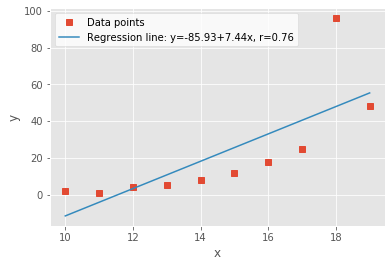

In [92]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()



Kotak merah mewakili pengamatan, sedangkan garis biru adalah garis regresi. Persamaan garis tercantum dalam legenda bersama dengan koefisien korelasi.

# Heatsmaps of Correlaion Matrices

Matriks korelasi dapat menjadi sangat besar dan membingungkan ketika terdapat banyak fitur. Untuk itu, kita dapat memvisualisasikannya sebagai heatmap di mana setiap bidang memiliki warna yang sesuai dengan nilainya.

In [93]:
corr_matrix = np.corrcoef(xyz).round(decimals=2) 

In [94]:
corr_matrix

array([[ 1.  ,  0.76, -0.97],
       [ 0.76,  1.  , -0.83],
       [-0.97, -0.83,  1.  ]])

Fungsi .round() adalah untuk membulatkan angka-angka dalam matriks korelasi.

Untuk membuat heatmap dengan .imshow() dan matrik korelasi sebagai argumennya.

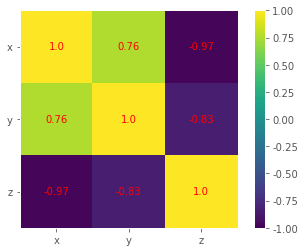

In [95]:
fig, ax = plt.subplots()
im = ax.imshow(corr_matrix)
im.set_clim(-1,1)
ax.grid(False)
ax.xaxis.set(ticks=(0,1,2), ticklabels=('x', 'y' , 'z'))
ax.yaxis.set(ticks=(0,1,2), ticklabels=('x', 'y' , 'z'))
ax.set_ylim(2.5, -0.5)
for i in range(3):
    for j in range(3):
        ax.text(j, i, corr_matrix[i , j], ha='center', va='center',
                                 color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='%.2f')
plt.show()


## T-Test

T test adalah rasio antara perbedaan antara dua kelompok dan perbedaan dalam kelompok. semakin besar  skor t, semakin banyak perbedaan antara kelompok. semakin kecil skor t, semakin banyak kesamaan antara kelompok.

In [96]:
import numpy as np
from scipy import stats

N = 10

a = np.random.randn(N) + 2

b = np.random.randn(N)

print(a)
print(b)

var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

s=np.sqrt((var_a + var_b)/2) #--> Mencari Standar Deviasi
s

#Mencari T-Test secara manual dengan syntax python
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))

#p-Value
df = 2*N -2

p = 1-stats.t.cdf(t, df=df)

print("t = " + str(t))
print("p = " + str(2 * p))

#Scipy utuk mencari t score

t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(2 * p2))


[2.98671148 2.07092366 2.24828896 1.67884338 0.79818279 1.76815137
 3.26310616 4.10242218 3.35737766 2.26540256]
[ 1.41783775 -2.37858041  1.56023432  0.46659805 -1.56599649  1.13642602
  0.83406673  0.97175186 -1.13105479 -0.32239517]
t = 4.424493624765953
p = 0.00032725239261899297
t = 4.424493624765952
p = 0.0006545047852378566


## Z-Score



z skor disebut skor standar.

Studi kasus penggunaan z-score :

Pertimbangkan Alice. Pada ujian A. Level, dia mendapat:

Kimia: 80

Matematika: 70

Fisika: 70

Sebelum kami mengadopsi Z-Skor (sebut saja Sistem Lama-Lama), tanda agregat mentah menentukan entri universitas.

Misalnya, agregat Alice adalah 80 + 70 + 70 = 220. Dia akan mendapatkan masuk ke program universitas mana pun, di mana A) Kimia, Matematika dan Fisika adalah mata pelajaran yang cukup, dan B) 220 adalah agregat yang cukup.

Dalam Sistem Lama-Lama ini, tanda apa pun dari subjek apa pun adalah sama. Misalnya, jika Alice mendapat 20 nilai lebih sedikit untuk Matematika (50) dan 20 nilai tambahan untuk Fisika (90), ia masih akan memiliki agregat yang sama yaitu 220. Dan yang lebih penting, peluang yang sama untuk masuk universitas.

Tetapi apakah asumsi "tanda apa pun dari subjek apa pun adalah sama" masuk akal? Lagipula, bukankah beberapa subjek “lebih mudah” daripada yang lain? Jika demikian, siswa yang berhasil dalam mata pelajaran “sulit” (yang memiliki nilai lebih rendah) tidak diuntungkan. Dibandingkan dengan subjek yang “lebih mudah” (yang memiliki nilai lebih tinggi).

Untuk menganalisis asumsi ini, mari kita perhatikan nilai semua siswa yang mengambil Kimia, Matematika dan Fisika. Sementara dalam praktiknya ada 100.000 siswa, untuk kesederhanaan, anggap saja hanya ada lima. Termasuk Alice.

Dan misalkan tanda itu adalah sebagai berikut, dengan tanda Alice dicetak tebal.

Chemistry\ 50, 60, 70, 80(Nilai Alice), 90

Maths\ 30, 40, 50, 60, 70(Nilai Alice)

Physics\ 10, 30, 50, 70(Nilai Alice), 90

apa yang bisa kita amati?

Sepertinya ujian Matematika tahun ini jauh lebih "sulit" daripada makalah Kimia. Dan 70 untuk Matematika dari Alice, adalah nilai tertinggi. Meskipun 10 tanda kurang dari 80 untuk Kimia.
Demikian pula, 70 untuk Matematika terlihat lebih baik daripada 70 untuk Fisika.

Sementara Fisika dan Matematika memiliki tanda "rata-rata" yang sama (50), tanda untuk Fisika tampaknya memiliki lebih banyak "variasi". Sementara nilai untuk Matematika lebih "berkerumun dekat". Oleh karena itu, jika Alice mendapat 20 nilai lebih sedikit untuk Matematika, dan 20 nilai lebih untuk Fisika, ia harus melakukan "lebih buruk" untuk Matematika daripada "lebih baik" untuk Fisika. Karena 20 nilai yang sama melompat dari 70 ke 50 untuk Matematika tampaknya memiliki arti yang lebih penting daripada melompat yang sama dari 70 ke 90 untuk Fisika.

Mengapa pengamatan ini penting?

70 Alice untuk matematika harus membawa "lebih banyak" di penerimaan universitas daripada 80 untuk Kimia atau 70 untuk Fisika. Tetapi tidak. Ini tidak adil.
 
Alice (yang mendapat 70 untuk Matematika dan 70 untuk Fisika) mungkin lebih baik daripada siswa yang mendapat 50 untuk Matematika dan 90 untuk Fisika. Ini juga tidak dipertimbangkan.

Untuk mendapatkan hasil yang optimal, kita dapat mencari nya menggunakan z - score:

Semua masalah ini muncul dari subjek yang berbeda berbeda dalam dua properti. Para ahli statistik menyebut ini "berarti" dan "standar deviasi". "Berarti" adalah tanda rata-rata. “Deviasi Standar” adalah “jumlah deviasi atau variasi” pada tanda.

Misalnya, Kimia, Matematika dan Fisika masing-masing memiliki rata-rata 70, 50 dan 50. Rata-rata hanya dari lima angka.

Kimia dan Matematika keduanya memiliki Deviasi Standar 15,81. Fisika memiliki Standar Deviasi 31,62. Ini sesuai dengan intuisi kita. Fisika memiliki dua kali lipat "variasi" Kimia dan Matematika.

Masalah terpecahkan

Sistem Z-Score memecahkan masalah subyek yang berbeda memiliki cara dan deviasi standar yang berbeda, dengan "menormalkan" tanda mentah sebagai berikut.

Z-Score = (Tanda Raw - Rata-Rata) / St. Dev

Setelah normalisasi, tanda mentah ditransformasikan menjadi z-skor sebagai berikut:

Kimia \ -1.26, -0.63, 0, 0.63(Alice), 1.26

Matematika \ -1.26, -0.63, 0, 0.63(Alice), 1.26

Physics\-1.26, -0.63, 0, 0.63(Alice), 1.26

Skor z skor rata-rata alice adalah (-0.63 + 1.26 + 0.63) / 3

Kinerja alice dalam mengerjakan math lebih berat dibandingkan fisika dan kimia. 

Jadi seharunya dengan z skor Alice bisa mendapatkan program untuk masuk universitas dengan nila matematika A.

In [97]:
chemistry = [50 , 60 , 70, 80, 90]
math = [30, 40, 50, 60, 70]
physics = [10, 30, 50, 70, 90]

In [98]:
from scipy import stats

print(stats.zscore(chemistry))
print(stats.zscore(math))
print(stats.zscore(physics))

[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
[-1.41421356 -0.70710678  0.          0.70710678  1.41421356]
